In [1]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Sample4.csv to Sample4.csv


In [4]:
laundering_data = pd.read_csv(
    "Sample4.csv",
    parse_dates=True,
    infer_datetime_format=True
)

laundering_data



Unnamed: 0         Timestamp  From Bank    Account  To Bank  \
0                0  2022/09/08 13:59       4726  807215870    23538   
1                1  2022/09/09 15:46         70  1004286A8   117698   
2                2  2022/09/05 23:11      16788  8041F5380    11813   
3                3  2022/09/09 19:56         70  100428780       16   
4                4  2022/09/06 08:01      28237  80A89A140    30039   
...            ...               ...        ...        ...      ...   
101562      101562  2022/09/02 16:09      44458  8118F24E0       22   
101563      101563  2022/09/01 21:09         12  80018EE40    18015   
101564      101564  2022/09/09 00:03         11  8006CA910   214100   
101565      101565  2022/09/08 00:38     243614  81013F670      119   
101566      101566  2022/09/05 03:09      43460  810D69900   143430   

        Account.1  Amount Received Receiving Currency  Amount Paid  \
0       809350870          2489.79          US Dollar      2489.79   
1       80BA727F0          1802.44               Euro      1802.44   
2       805DFD130            27.93          US Dollar        27.93   
3       8049AF0E0       4915318.35              Rupee   4915318.35   
4       80B080DB0             0.10  Australian Dollar         0.10   
...           ...              ...                ...          ...   
101562  812D76B30           446.12               Euro       446.12   
101563  8077DC800           119.51          US Dollar       119.51   
101564  80D22CA10           157.94               Euro       157.94   
101565  810193670           622.80             Shekel       622.80   
101566  811201090         35222.29             Shekel     35222.29   

         Payment Currency Payment Format  Is Laundering  
0               US Dollar         Cheque              0  
1                    Euro         Cheque              0  
2               US Dollar    Credit Card              0  
3                   Rupee         Cheque              0  
4       Australian Dollar           Wire              0  
...                   ...            ...            ...  
101562               Euro           Wire              0  
101563          US Dollar            ACH              0  
101564               Euro    Credit Card              0  
101565             Shekel         Cheque              0  
101566             Shekel    Credit Card              0  

[101567 rows x 12 columns]

In [5]:
laundering_data

Unnamed: 0         Timestamp  From Bank    Account  To Bank  \
0                0  2022/09/08 13:59       4726  807215870    23538   
1                1  2022/09/09 15:46         70  1004286A8   117698   
2                2  2022/09/05 23:11      16788  8041F5380    11813   
3                3  2022/09/09 19:56         70  100428780       16   
4                4  2022/09/06 08:01      28237  80A89A140    30039   
...            ...               ...        ...        ...      ...   
101562      101562  2022/09/02 16:09      44458  8118F24E0       22   
101563      101563  2022/09/01 21:09         12  80018EE40    18015   
101564      101564  2022/09/09 00:03         11  8006CA910   214100   
101565      101565  2022/09/08 00:38     243614  81013F670      119   
101566      101566  2022/09/05 03:09      43460  810D69900   143430   

        Account.1  Amount Received Receiving Currency  Amount Paid  \
0       809350870          2489.79          US Dollar      2489.79   
1       80BA727F0          1802.44               Euro      1802.44   
2       805DFD130            27.93          US Dollar        27.93   
3       8049AF0E0       4915318.35              Rupee   4915318.35   
4       80B080DB0             0.10  Australian Dollar         0.10   
...           ...              ...                ...          ...   
101562  812D76B30           446.12               Euro       446.12   
101563  8077DC800           119.51          US Dollar       119.51   
101564  80D22CA10           157.94               Euro       157.94   
101565  810193670           622.80             Shekel       622.80   
101566  811201090         35222.29             Shekel     35222.29   

         Payment Currency Payment Format  Is Laundering  
0               US Dollar         Cheque              0  
1                    Euro         Cheque              0  
2               US Dollar    Credit Card              0  
3                   Rupee         Cheque              0  
4       Australian Dollar           Wire              0  
...                   ...            ...            ...  
101562               Euro           Wire              0  
101563          US Dollar            ACH              0  
101564               Euro    Credit Card              0  
101565             Shekel         Cheque              0  
101566             Shekel    Credit Card              0  

[101567 rows x 12 columns]

In [6]:
laundering_data.set_index('Timestamp')

Unnamed: 0  From Bank    Account  To Bank  Account.1  \
Timestamp                                                                
2022/09/08 13:59           0       4726  807215870    23538  809350870   
2022/09/09 15:46           1         70  1004286A8   117698  80BA727F0   
2022/09/05 23:11           2      16788  8041F5380    11813  805DFD130   
2022/09/09 19:56           3         70  100428780       16  8049AF0E0   
2022/09/06 08:01           4      28237  80A89A140    30039  80B080DB0   
...                      ...        ...        ...      ...        ...   
2022/09/02 16:09      101562      44458  8118F24E0       22  812D76B30   
2022/09/01 21:09      101563         12  80018EE40    18015  8077DC800   
2022/09/09 00:03      101564         11  8006CA910   214100  80D22CA10   
2022/09/08 00:38      101565     243614  81013F670      119  810193670   
2022/09/05 03:09      101566      43460  810D69900   143430  811201090   

                  Amount Received Receiving Currency  Amount Paid  \
Timestamp                                                           
2022/09/08 13:59          2489.79          US Dollar      2489.79   
2022/09/09 15:46          1802.44               Euro      1802.44   
2022/09/05 23:11            27.93          US Dollar        27.93   
2022/09/09 19:56       4915318.35              Rupee   4915318.35   
2022/09/06 08:01             0.10  Australian Dollar         0.10   
...                           ...                ...          ...   
2022/09/02 16:09           446.12               Euro       446.12   
2022/09/01 21:09           119.51          US Dollar       119.51   
2022/09/09 00:03           157.94               Euro       157.94   
2022/09/08 00:38           622.80             Shekel       622.80   
2022/09/05 03:09         35222.29             Shekel     35222.29   

                   Payment Currency Payment Format  Is Laundering  
Timestamp                                                          
2022/09/08 13:59          US Dollar         Cheque              0  
2022/09/09 15:46               Euro         Cheque              0  
2022/09/05 23:11          US Dollar    Credit Card              0  
2022/09/09 19:56              Rupee         Cheque              0  
2022/09/06 08:01  Australian Dollar           Wire              0  
...                             ...            ...            ...  
2022/09/02 16:09               Euro           Wire              0  
2022/09/01 21:09          US Dollar            ACH              0  
2022/09/09 00:03               Euro    Credit Card              0  
2022/09/08 00:38             Shekel         Cheque              0  
2022/09/05 03:09             Shekel    Credit Card              0  

[101567 rows x 11 columns]

In [7]:
laundering_data.drop(columns=['From Bank','Account','To Bank','Account.1','Amount Received','Receiving Currency','Amount Paid','Payment Currency','Payment Format'],inplace=True)

In [8]:
prophet_data=laundering_data.rename(columns={'Timestamp': 'ds','Is Laundering': 'y'})

In [9]:
prophet_data

Unnamed: 0                ds  y
0                0  2022/09/08 13:59  0
1                1  2022/09/09 15:46  0
2                2  2022/09/05 23:11  0
3                3  2022/09/09 19:56  0
4                4  2022/09/06 08:01  0
...            ...               ... ..
101562      101562  2022/09/02 16:09  0
101563      101563  2022/09/01 21:09  0
101564      101564  2022/09/09 00:03  0
101565      101565  2022/09/08 00:38  0
101566      101566  2022/09/05 03:09  0

[101567 rows x 3 columns]

In [10]:
model_laundering_data=Prophet()

In [11]:
model_laundering_data.fit(prophet_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_6oir8/r_0sb8ju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_6oir8/g36c4j8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58021', 'data', 'file=/tmp/tmpwu_6oir8/r_0sb8ju.json', 'init=/tmp/tmpwu_6oir8/g36c4j8u.json', 'output', 'file=/tmp/tmpwu_6oir8/prophet_model5cej8o6p/prophet_model-20231209233730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:37:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = model_laundering_data.make_future_dataframe(periods=365)

In [13]:
forecast = model_laundering_data.predict(future)


In [14]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  \
0     2022-09-01 00:00:00  -0.071221   -0.039760    0.037722    -0.071221   
1     2022-09-01 00:01:00  -0.071146   -0.039766    0.042113    -0.071146   
2     2022-09-01 00:02:00  -0.071071   -0.038304    0.040737    -0.071071   
3     2022-09-01 00:03:00  -0.070997   -0.041534    0.040244    -0.070997   
4     2022-09-01 00:04:00  -0.070922   -0.037676    0.039426    -0.070922   
...                   ...        ...         ...         ...          ...   
14492 2023-09-12 13:43:00  34.748149 -254.992021  334.734175  -255.122533   
14493 2023-09-13 13:43:00  34.842306 -256.088615  335.883204  -256.266255   
14494 2023-09-14 13:43:00  34.936463 -257.347446  337.000655  -257.357938   
14495 2023-09-15 13:43:00  35.030621 -258.496770  338.963817  -258.479394   
14496 2023-09-16 13:43:00  35.124778 -259.928474  340.648913  -259.768683   

       trend_upper  additive_terms  additive_terms_lower  \
0        -0.071221        0.071295              0.071295   
1        -0.071146        0.071220              0.071220   
2        -0.071071        0.071145              0.071145   
3        -0.070997        0.071070              0.071070   
4        -0.070922        0.070994              0.070994   
...            ...             ...                   ...   
14492   334.612845        0.129691              0.129691   
14493   335.792587        0.111862              0.111862   
14494   336.983704        0.002695              0.002695   
14495   339.094198       -0.092707             -0.092707   
14496   340.846447       -0.194862             -0.194862   

       additive_terms_upper     daily  daily_lower  daily_upper    weekly  \
0                  0.071295 -0.002330    -0.002330    -0.002330  0.073625   
1                  0.071220 -0.002326    -0.002326    -0.002326  0.073546   
2                  0.071145 -0.002322    -0.002322    -0.002322  0.073467   
3                  0.071070 -0.002318    -0.002318    -0.002318  0.073388   
4                  0.070994 -0.002314    -0.002314    -0.002314  0.073309   
...                     ...       ...          ...          ...       ...   
14492              0.129691  0.001913     0.001913     0.001913  0.127778   
14493              0.111862  0.001913     0.001913     0.001913  0.109949   
14494              0.002695  0.001913     0.001913     0.001913  0.000783   
14495             -0.092707  0.001913     0.001913     0.001913 -0.094620   
14496             -0.194862  0.001913     0.001913     0.001913 -0.196775   

       weekly_lower  weekly_upper  multiplicative_terms  \
0          0.073625      0.073625                   0.0   
1          0.073546      0.073546                   0.0   
2          0.073467      0.073467                   0.0   
3          0.073388      0.073388                   0.0   
4          0.073309      0.073309                   0.0   
...             ...           ...                   ...   
14492      0.127778      0.127778                   0.0   
14493      0.109949      0.109949                   0.0   
14494      0.000783      0.000783                   0.0   
14495     -0.094620     -0.094620                   0.0   
14496     -0.196775     -0.196775                   0.0   

       multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                             0.0                         0.0   0.000074  
1                             0.0                         0.0   0.000074  
2                             0.0                         0.0   0.000073  
3                             0.0                         0.0   0.000073  
4                             0.0                         0.0   0.000073  
...                           ...                         ...        ...  
14492                         0.0                         0.0  34.877840  
14493                         0.0                         0.0  34.954168  
14494                         0.0                         0.0  34.93

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
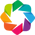

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [15]:
hv.extension('bokeh')
forecast.hvplot()

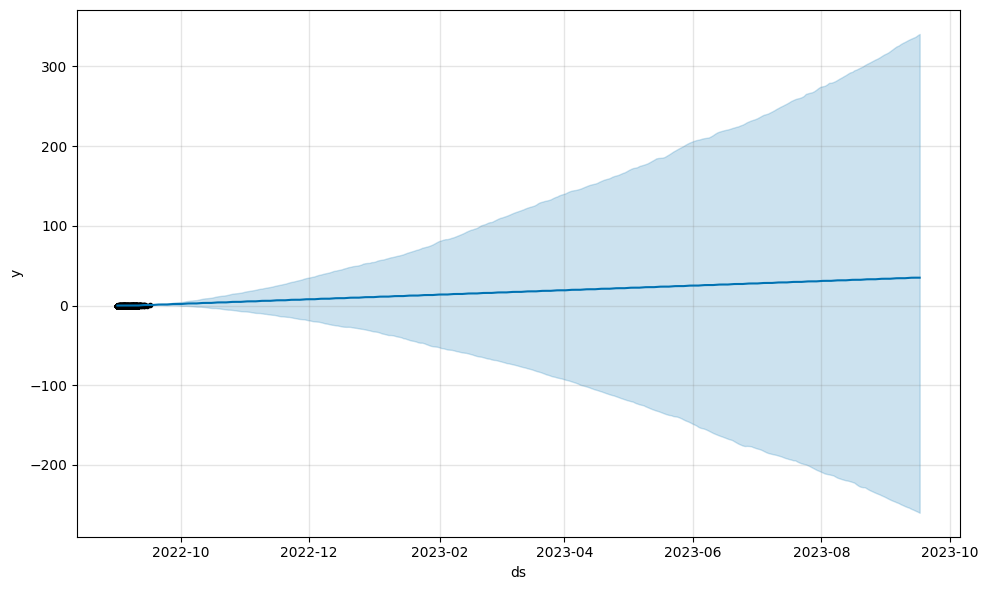

In [16]:
# Plot the forecast
fig = model_laundering_data.plot(forecast)

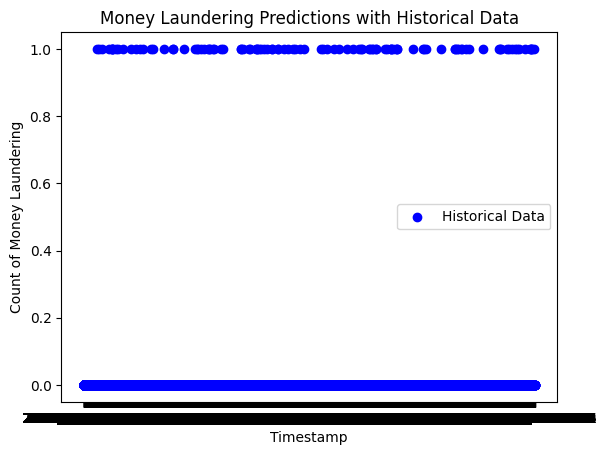

In [18]:
# Plot the historical data as blue dots
plt.scatter(prophet_data['ds'], prophet_data['y'], color='blue', label='Historical Data')

# Customize the plot
plt.title('Money Laundering Predictions with Historical Data')
plt.xlabel('Timestamp')
plt.ylabel('Count of Money Laundering')
plt.legend()
plt.show()

In [19]:
forecast['day_of_week'] = forecast['ds'].dt.day_name()

In [20]:
daily_summary = forecast.groupby('day_of_week')['yhat'].sum().reset_index()

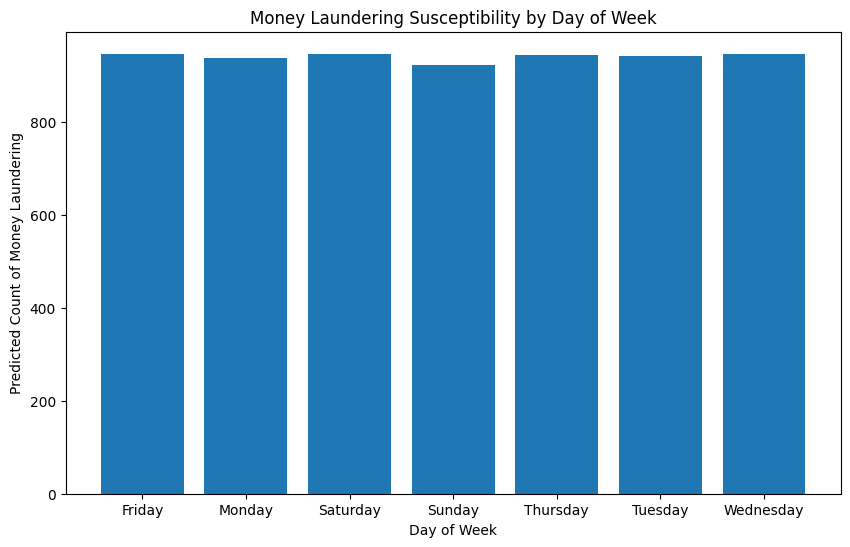

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(daily_summary['day_of_week'], daily_summary['yhat'])
plt.title('Money Laundering Susceptibility by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Predicted Count of Money Laundering')
plt.show()